<a href="https://colab.research.google.com/github/Nhutsang/Finalproject/blob/main/animal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from numpy import asarray,save
from sklearn.model_selection import train_test_split
from time import time
from keras.utils import load_img, img_to_array
from keras.utils  import to_categorical
from keras.models import Sequential, Model
from keras.layers import *
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.engine.training import optimizers
from keras.backend import categorical_crossentropy

In [70]:
import os
import cv2
import numpy as np

data_folder = '/content/drive/MyDrive/database/datatrain/'
categories = ['Dogs', 'Cats', 'Chicken', 'Horse', 'Squirrel']

X = []
y = []

# Đọc và chuyển đổi ảnh thành ma trận numpy
for category in categories:
    category_dir = os.path.join(data_folder, category)
    for image_file in os.listdir(category_dir):
        image_path = os.path.join(category_dir, image_file)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (50, 50))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        X.append(image)
        y.append(categories.index(category))

# Chuyển đổi danh sách thành mảng numpy
X = np.array(X)
y = np.array(y)

# In thông tin của X_train và y_train
print('Kích thước X_train:', X.shape)
print('kich thuoc y:', y.shape)

Kích thước X_train: (6616, 40, 40, 3)
kich thuoc y: (6616,)


In [71]:
X_train_val, X_test , y_train_val , y_test = train_test_split(X, y , test_size = 0.1)
X_train , X_val , y_train , y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2)

In [72]:

print('Kích thước X_train:', X_train.shape)
print('kich thuoc y_train:', y_train.shape)

print('Kích thước X_val:', X_val.shape)
print('kich thuoc y_val:', y_val.shape)

print('Kích thước X_test:', X_test.shape)
print('kich thuoc y_test:', y_test.shape)

Kích thước X_train: (4763, 40, 40, 3)
kich thuoc y_train: (4763,)
Kích thước X_val: (1191, 40, 40, 3)
kich thuoc y_val: (1191,)
Kích thước X_test: (662, 40, 40, 3)
kich thuoc y_test: (662,)


In [73]:
 #one hot enccoding giatri mau tung diem anh tu thap phan duoi dang 10 bit
trainY = to_categorical (y_train)
testY=to_categorical(y_test)
valY=to_categorical(y_val)

print(trainY.shape)
print(testY.shape)
print(valY.shape)

(4763, 5)
(662, 5)
(1191, 5)


In [85]:
batch_size = 32
epochs = 60
classes = 5
img_size = 50 
#Tạo 1 mạng có 28x28 input và 10 output
model = Sequential()

# 1 bộ VGG
model.add(Conv2D(32, kernel_size=(3,3), activation = 'tanh', input_shape=(img_size,img_size,3),padding = 'same'))
model.add(LeakyReLU(alpha=0.1))  # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding='same'))


# Bộ 2 VGG
model.add(Conv2D(64,(3,3) , activation = 'tanh' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))

# Bộ 3 VGG
model.add(Conv2D(128,(3,3) , activation = 'tanh' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))




# ANN Model
model.add(Flatten()) # Lấy kích thước trước rồi làm phẳng
model.add(Dense(128, activation = 'tanh'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes , activation = 'softmax'))     



model.compile( loss= categorical_crossentropy , optimizer = Adam() , metrics=['accuracy'])


model.summary()

NameError: ignored

In [78]:
start = time()
train = model.fit(X_train, trainY, batch_size ,epochs=70, verbose = 1, validation_data=(X_val, valY))

Epoch 1/70
239/239 [==============================] - 1s 6ms/step - loss: 4.6420e-04 - accuracy: 1.0000 - val_loss: 1.6344 - val_accuracy: 0.6423
Epoch 2/70
239/239 [==============================] - 1s 5ms/step - loss: 4.0131e-04 - accuracy: 1.0000 - val_loss: 1.6567 - val_accuracy: 0.6440
Epoch 3/70
239/239 [==============================] - 1s 5ms/step - loss: 3.5189e-04 - accuracy: 1.0000 - val_loss: 1.6604 - val_accuracy: 0.6432
Epoch 4/70
239/239 [==============================] - 1s 4ms/step - loss: 3.0771e-04 - accuracy: 1.0000 - val_loss: 1.6805 - val_accuracy: 0.6440
Epoch 5/70
239/239 [==============================] - 2s 6ms/step - loss: 2.7194e-04 - accuracy: 1.0000 - val_loss: 1.7084 - val_accuracy: 0.6440
Epoch 6/70
239/239 [==============================] - 2s 7ms/step - loss: 2.3735e-04 - accuracy: 1.0000 - val_loss: 1.7225 - val_accuracy: 0.6440
Epoch 7/70
239/239 [==============================] - 1s 5ms/step - loss: 2.0797e-04 - accuracy: 1.0000 - val_loss: 1.7433 -

1/1 [==============================] - 0s 20ms/step
True Label: Horse
Predicted Label: Cats


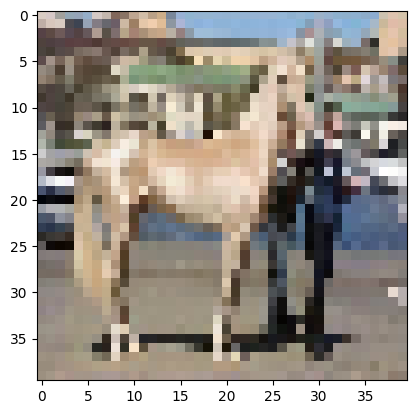

In [79]:
# Lấy một hình ảnh từ tập test
id = 600
image = X_test[id]
label = y_test[id]
classname= {0:'Dogs', 1:'Cats', 2:'Chicken',3:'Horse', 4:'Squirrel'} 

# Đưa hình ảnh về đúng kích thước và định dạng phù hợp
image = np.expand_dims(image , axis=0)

# Dự đoán nhãn của hình ảnh sử dụng mô hình
predictions = model.predict(image)

# Chuyển đổi dự đoán thành nhãn tương ứng dựa trên xác suất lớn nhất
predicted_label = np.argmax(predictions)

# In kết quả dự đoán
print('True Label:', classname[label])
print('Predicted Label:', classname[predicted_label])
plt.imshow(X_test[id])

In [80]:
import random
correct_predictions = 0
total_predictions = 0

for i in range(0,600):
  img = X_test[i]
  # Đưa hình ảnh về đúng kích thước và định dạng phù hợp
  image = np.expand_dims(img , axis=0)  
  
  # Dự đoán nhãn của hình ảnh sử dụng mô hình
  predictions = model.predict(image)
  # Chuyển đổi dự đoán thành nhãn tương ứng dựa trên xác suất cao nhất
  predicted_label = np.argmax(predictions)

  # Kiểm tra xem dự đoán có đúng hay không
  truelabel = y_test[i]
  if predicted_label == truelabel:
    correct_predictions += 1

accuracy = (correct_predictions/600)*100
print("Accuracy:", accuracy , "%")


1/1 [==============================] - 0s 18ms/step
Accuracy: 67.16666666666666 %
